In [809]:
# import libraries
# DataFrame
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# sklearny
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB


#tensorflow
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

# Utility
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

# Loading Dataset

In [810]:
# Construct a tf.data.Dataset
data = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='latin', names = ['polarity','id','date','query','user','text'])

In [811]:
# Random shuffling of data, select the first 200,000
data = data.sample(frac=1)
data = data[:20000]

# Data Visualization

In [812]:
print("Dataset shape:", data.shape)

Dataset shape: (20000, 6)


In [813]:
data.head(10)

,polarity,id,date,query,user,text
973235,4,1832946876,Sun May 17 21:53:32 PDT 2009,NO_QUERY,CasperMcFadden,"@poetwist This makes me smile, too! JV, you'r..."
927501,4,1759201236,Sun May 10 18:41:21 PDT 2009,NO_QUERY,rizalrenaldi,"eh eh, gue pake kemeja lho hari ini *rapih bos..."
1274067,4,2000925044,Mon Jun 01 23:20:13 PDT 2009,NO_QUERY,MarsBB,@ella_1417 Can you just send me the link? Heh...
197212,0,1970956551,Sat May 30 05:46:55 PDT 2009,NO_QUERY,liemvo,frustrated
1456453,4,2063497703,Sun Jun 07 02:54:12 PDT 2009,NO_QUERY,shell_here,David Attenborough's doing 10 min natural hist...
1007599,4,1880720335,Fri May 22 02:15:26 PDT 2009,NO_QUERY,MFL_Shortstack,@bradiewebbstack LOL bradie my friend told me ...
717653,0,2260064115,Sat Jun 20 18:36:40 PDT 2009,NO_QUERY,asphyxiation359,Trying to study for my eggjams... not going s...
1389805,4,2053159857,Sat Jun 06 03:30:35 PDT 2009,NO_QUERY,celinieee,"http://tr.im/nCHD - The Wonder Girls,Katy Perr..."
488020,0,2182403611,Mon Jun 15 13:07:25 PDT 2009,NO_QUERY,jlazaroff,"@craigeryowens Argh, why can't you live in New..."
1535160,4,2178953917,Mon Jun 15 08:26:26 PDT 2009,NO_QUERY,MissAdaa,Good morninggggg


In [814]:
data['polarity'].unique()

array([4, 0])

In [815]:
# Replacing the value 4 -->1 for ease of understanding.
data['polarity'] = data['polarity'].replace(4,1)
data.head()

,polarity,id,date,query,user,text
973235,1,1832946876,Sun May 17 21:53:32 PDT 2009,NO_QUERY,CasperMcFadden,"@poetwist This makes me smile, too! JV, you'r..."
927501,1,1759201236,Sun May 10 18:41:21 PDT 2009,NO_QUERY,rizalrenaldi,"eh eh, gue pake kemeja lho hari ini *rapih bos..."
1274067,1,2000925044,Mon Jun 01 23:20:13 PDT 2009,NO_QUERY,MarsBB,@ella_1417 Can you just send me the link? Heh...
197212,0,1970956551,Sat May 30 05:46:55 PDT 2009,NO_QUERY,liemvo,frustrated
1456453,1,2063497703,Sun Jun 07 02:54:12 PDT 2009,NO_QUERY,shell_here,David Attenborough's doing 10 min natural hist...


In [816]:
data.describe()

,polarity,id
count,20000.000000,2.000000e+04
mean,0.498250,1.999647e+09
std,0.500009,1.934646e+08
min,0.000000,1.467825e+09
25%,0.000000,1.956863e+09
50%,0.000000,2.002323e+09
75%,1.000000,2.177801e+09
max,1.000000,2.329198e+09


In [817]:
# check the number of positive vs. negative tagged sentences
positives = data['polarity'][data.polarity == 1 ]
negatives = data['polarity'][data.polarity == 0 ]

print('Total length of the data is:         {}'.format(data.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         20000
No. of positve tagged sentences is:  9965
No. of negative tagged sentences is: 10035


In [818]:
# get a word count per of text
def word_count(words):
    return len(words.split())

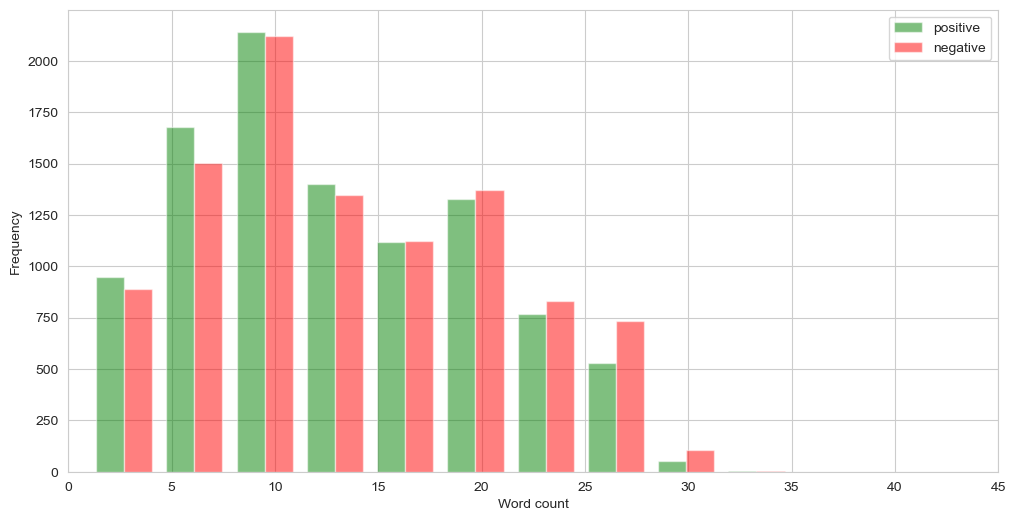

In [819]:
# plot word count distribution for both positive and negative

data['word count'] = data['text'].apply(word_count)
p = data['word count'][data.polarity == 1]
n = data['word count'][data.polarity == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['g','r'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [820]:
# get common words in training dataset
from collections import Counter
all_words = []
for line in list(data['text']):
    words = line.split()
    for word in words:
      if(len(word)>2):
        all_words.append(word.lower())


Counter(all_words).most_common(20)

[('the', 6521),
 ('and', 3684),
 ('you', 2979),
 ('for', 2646),
 ('have', 1805),
 ('that', 1687),
 ("i'm", 1569),
 ('but', 1567),
 ('just', 1564),
 ('with', 1424),
 ('not', 1271),
 ('was', 1258),
 ('this', 1124),
 ('get', 996),
 ('all', 969),
 ('are', 930),
 ('good', 925),
 ('like', 918),
 ('out', 853),
 ("it's", 826)]

<Axes: xlabel='polarity', ylabel='count'>

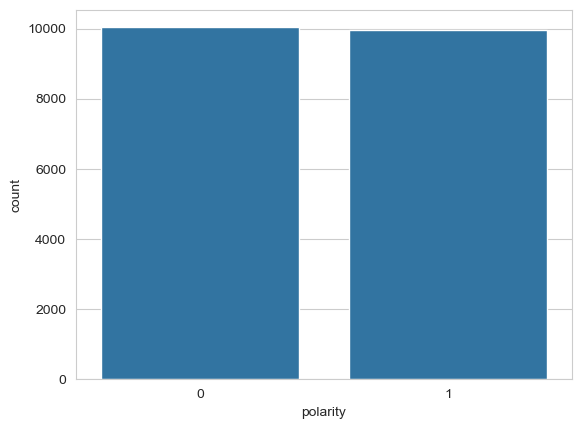

In [821]:
%matplotlib inline
sns.countplot(x=data['polarity'])

# Data Processing
## The Preprocessing steps taken are:
1. Lower Casing: Each text is converted to lowercase.
2. Removing URLs: Links starting with "http" or "https" or "www" are replaced by "".

3. Removing Usernames: Replace @Usernames with word "". (eg: "@XYZ" to "")

4. Removing Short Words: Words with length less than 2 are removed.
5. Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")
6. Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “wolves” to “wolf”)

In [822]:
# Removing the unnecessary columns.
data.drop(['date','query','user','word count'], axis=1, inplace=True)

In [823]:
data.drop('id', axis=1, inplace=True)
data.head(10)

,polarity,text
973235,1,"@poetwist This makes me smile, too! JV, you'r..."
927501,1,"eh eh, gue pake kemeja lho hari ini *rapih bos..."
1274067,1,@ella_1417 Can you just send me the link? Heh...
197212,0,frustrated
1456453,1,David Attenborough's doing 10 min natural hist...
1007599,1,@bradiewebbstack LOL bradie my friend told me ...
717653,0,Trying to study for my eggjams... not going s...
1389805,1,"http://tr.im/nCHD - The Wonder Girls,Katy Perr..."
488020,0,"@craigeryowens Argh, why can't you live in New..."
1535160,1,Good morninggggg


In [824]:
#Checking if any null values present
(data.isnull().sum() / len(data))*100

polarity    0.0
text        0.0
dtype: float64

In [825]:
#convrting pandas object to a string type
data['text'] = data['text'].astype('str')

In [826]:
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{"don't", 'where', 'she', "they'll", 'mightn', "we've", 'each', 'an', 'himself', 'who', "it'd", 'herself', 'won', 'their', "he's", "they'd", 'hadn', 've', "weren't", 'my', 'so', 'off', "hadn't", 'themselves', 'as', 'which', 'than', 'is', "shan't", "he'd", "we'll", 'will', 'didn', 'of', 'up', 'that', 'in', 'its', 'both', 'now', "aren't", 's', "you're", 'after', 'being', 'll', 'does', 'by', "mightn't", "you'd", 'do', 'very', "she'll", 'whom', 'has', "i'll", 'own', 'here', 'needn', 'but', 'all', 'further', 'such', 'can', 'some', 'hasn', 'theirs', "he'll", 'be', "isn't", 'between', 'what', "should've", 'then', 'under', 'no', 'been', 'don', "didn't", "it's", 'd', 'and', 'i', 'did', 'isn', 'over', 'to', 'ain', "i'd", 'should', 'any', 't', 'he', 'against', 'on', "wouldn't", 'again', 'for', "shouldn't", 'those', 'too', 'a', "doesn't", 'same', "she'd", 'into', 'shouldn', 'yourselves', 'having', "wasn't", 'only', 'with', 'me', "hasn't", 'are', 'it', "they've", 'o', 'aren', 'his', 'this', 'few', 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [827]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [828]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets(tweet):
    # Lower Casing
    tweet = tweet.lower()
    #tweet=tweet[1:]
    # Removing all URls
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet)
    # 移除非字母数字、空格和'的字符
    tweet = re.sub(r"[^\w\s']", '', tweet)
    # --- 特殊否定缩写处理 ---
    # 1. 明确处理 can't → cannot
    tweet = re.sub(r"\bcan't\b", "cannot", tweet)
    # 2. 处理 won't → will not
    tweet = re.sub(r"\bwon't\b", "will not", tweet)
    # 3. 处理 shan't → shall not
    tweet = re.sub(r"\bshan't\b", "shall not", tweet)
    # 4. 处理 ain't → is not
    tweet = re.sub(r"\bain't\b", "is not", tweet)
    # --- 通用n't处理 ---
    # 将剩余n't替换为 not（如didn't → did not）
    tweet = re.sub(r"n't\b", " not", tweet)
    # --- 处理其他撇号为空格（如I'll → I ll）---
    tweet = re.sub(r"'", ' ', tweet)
    #tokenizing words
    tokens = word_tokenize(tweet)
    # Remove punctuations but remain ‘n't’
    final_tokens = tokens
    #reducing a word to its word stem
    wordLemm = WordNetLemmatizer()
    finalwords=[]

    for w in tokens:
        if len(w) > 1:
            # 动词词性还原（解决 does→doe 问题）
            word = wordLemm.lemmatize(w, pos='v')
            # 名词词性还原（根据任务需求）
            word = wordLemm.lemmatize(word, pos='n')
            finalwords.append(word)
    return ' '.join(finalwords)


In [829]:
data['processed_tweets'] = data['text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [830]:
data.head(10)

,polarity,text,processed_tweets
973235,1,"@poetwist This makes me smile, too! JV, you'r...",this make me smile too jv you re cool for notice
927501,1,"eh eh, gue pake kemeja lho hari ini *rapih bos...",eh eh gue pake kemeja lho hari ini rapih bos p...
1274067,1,@ella_1417 Can you just send me the link? Heh...,can you just send me the link hehe thank ella
197212,0,frustrated,frustrate
1456453,1,David Attenborough's doing 10 min natural hist...,david attenborough do 10 min natural history t...
1007599,1,@bradiewebbstack LOL bradie my friend told me ...,lol bradie my friend tell me to tell that ur h...
717653,0,Trying to study for my eggjams... not going s...,try to study for my eggjams not go so well
1389805,1,"http://tr.im/nCHD - The Wonder Girls,Katy Perr...",the wonder girlskaty perryamplee hyori mix by ...
488020,0,"@craigeryowens Argh, why can't you live in New...",argh why can not you live in new jersey
1535160,1,Good morninggggg,good morninggggg


# Analyzing the data

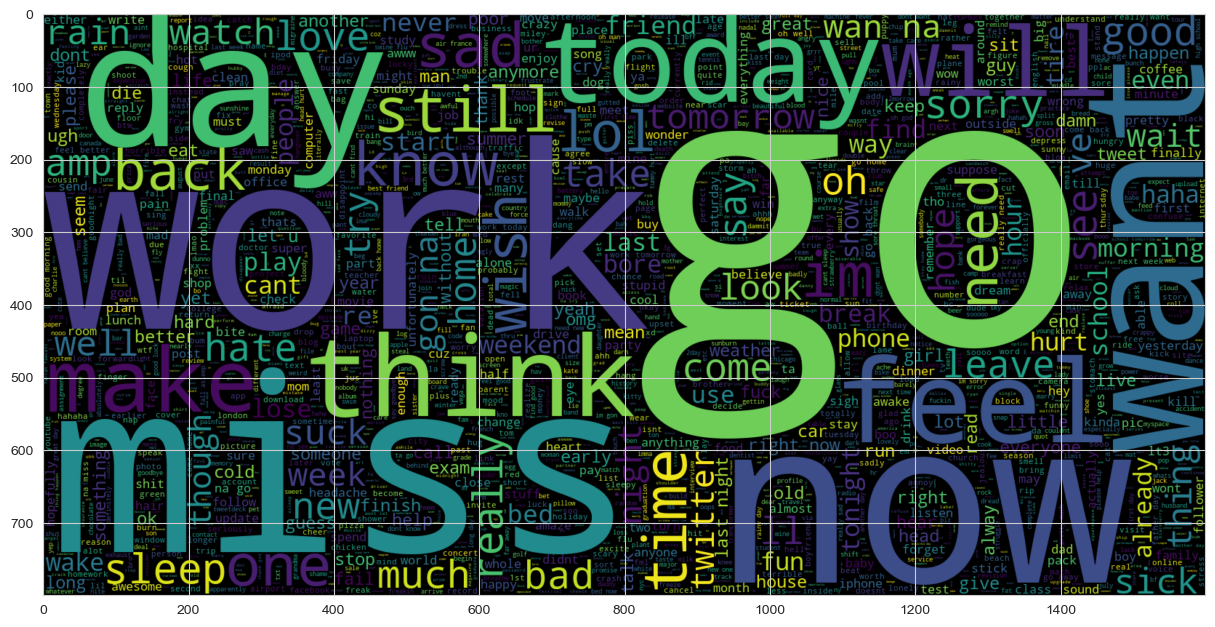

In [831]:
# Word-Cloud for Negative tweets
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.polarity == 0].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

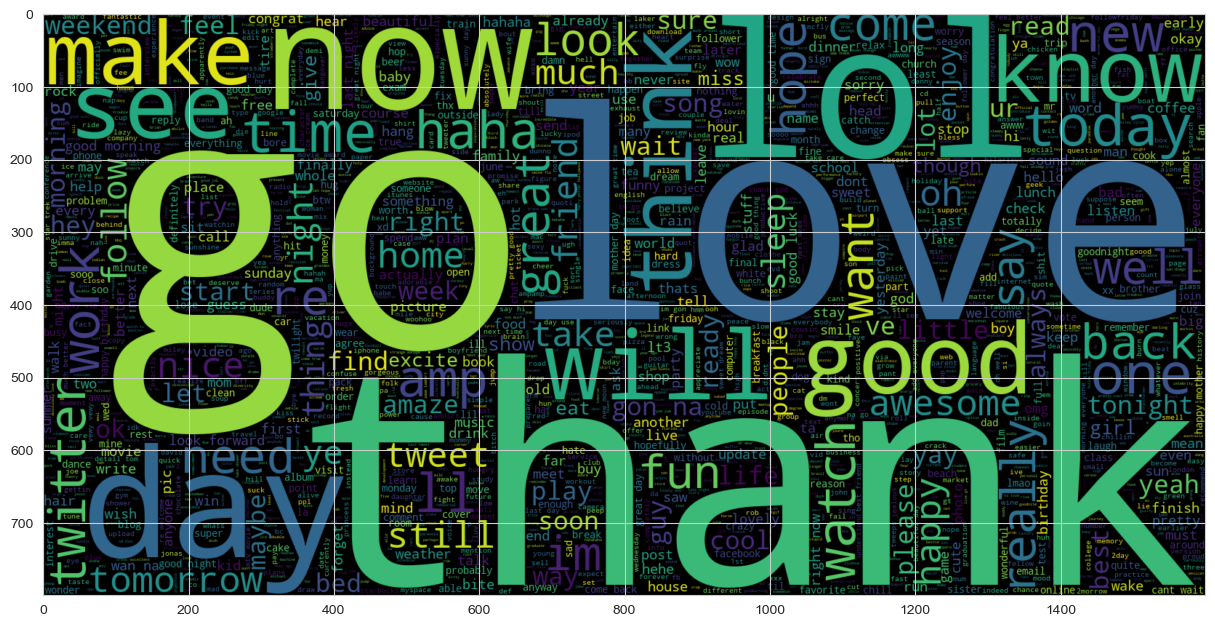

In [832]:
# Word-Cloud for Positive tweets
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.polarity == 1].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

In [833]:
# Vectorization and Splitting the dat
X = data['processed_tweets'].values
y = data['polarity'].values

print(X.shape)
print(y.shape)

(20000,)
(20000,)


In [834]:
# Convert text to word frequency vectors
#Convert a collection of raw documents to a matrix of TF-IDF features.
vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(X)
print(f'Vector fitted.')
print('No. of feature_words: ', len(vector.get_feature_names_out()))

print(vector.get_feature_names_out()[:10])

Vector fitted.
No. of feature_words:  20253
['0019' '023' '03' '04' '0445' '05' '0531' '060509' '0630' '07']


In [835]:
print(X.shape)
print(y.shape)

(20000, 20253)
(20000,)


# Traning preprocessing

In [836]:
# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=101)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (16000, 20253)
y_train (16000,)
X_test (4000, 20253)
y_test (4000,)


In [837]:
# Model evaluating function
def model_Evaluate(model):
    #accuracy of model on training data
    acc_train=model.score(X_train, y_train)
    #accuracy of model on test data
    acc_test=model.score(X_test, y_test)

    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

# Machine Learning Methods

Accuracy of model on training data : 84.68124999999999
Accuracy of model on testing data : 75.875 

              precision    recall  f1-score   support

           0       0.77      0.74      0.76      2038
           1       0.74      0.78      0.76      1962

    accuracy                           0.76      4000
   macro avg       0.76      0.76      0.76      4000
weighted avg       0.76      0.76      0.76      4000



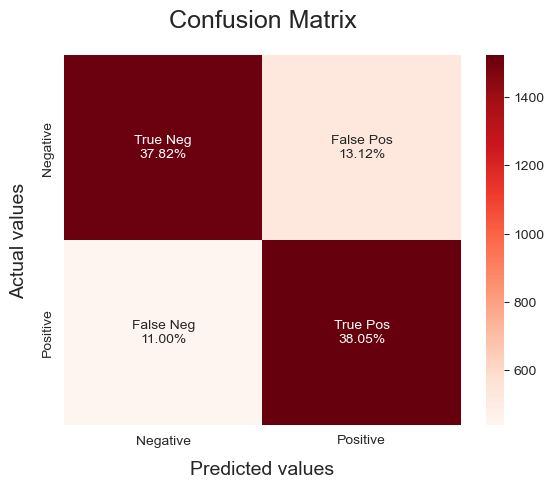

In [838]:
# Logistic Regression
lg = LogisticRegression()
history=lg.fit(X_train, y_train)
model_Evaluate(lg)

Accuracy of model on training data : 93.65
Accuracy of model on testing data : 73.575 

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      2038
           1       0.72      0.75      0.73      1962

    accuracy                           0.74      4000
   macro avg       0.74      0.74      0.74      4000
weighted avg       0.74      0.74      0.74      4000



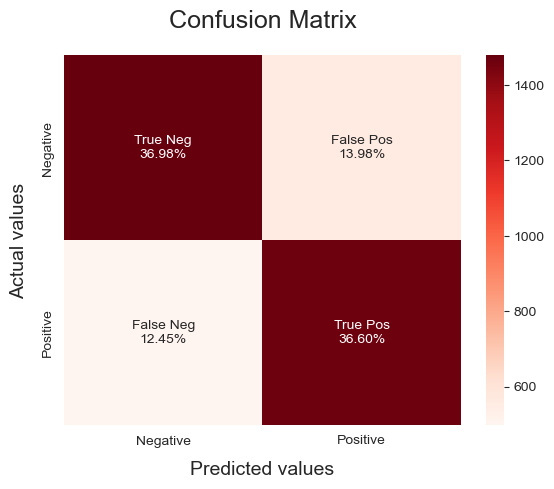

In [839]:
# Linear SVM
svm = LinearSVC()
svm.fit(X_train, y_train)
model_Evaluate(svm)

Accuracy of model on training data : 86.88125
Accuracy of model on testing data : 71.325 

              precision    recall  f1-score   support

           0       0.74      0.68      0.71      2038
           1       0.69      0.75      0.72      1962

    accuracy                           0.71      4000
   macro avg       0.71      0.71      0.71      4000
weighted avg       0.72      0.71      0.71      4000



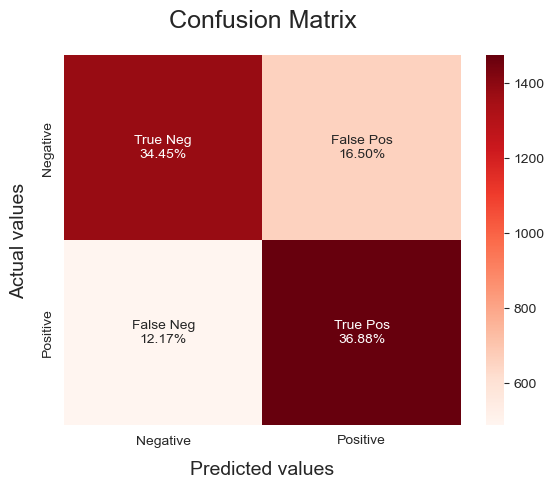

In [840]:
# Random Forest
rf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth=50)
rf.fit(X_train, y_train)
model_Evaluate(rf)

Accuracy of model on training data : 87.14375
Accuracy of model on testing data : 74.225 

              precision    recall  f1-score   support

           0       0.75      0.74      0.75      2038
           1       0.73      0.74      0.74      1962

    accuracy                           0.74      4000
   macro avg       0.74      0.74      0.74      4000
weighted avg       0.74      0.74      0.74      4000



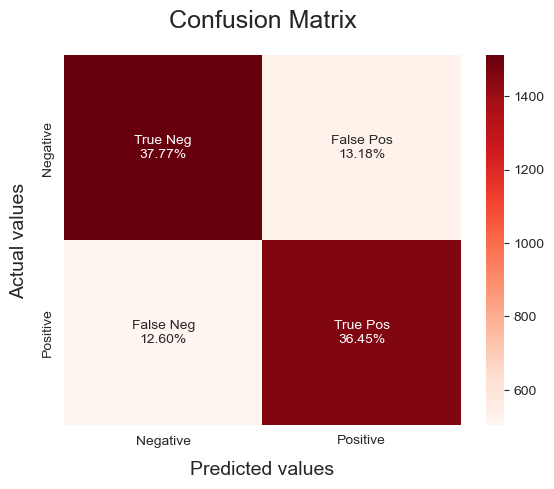

In [841]:
# Naive Bayes
nb = BernoulliNB()
nb.fit(X_train, y_train)
model_Evaluate(nb)

# RNN - LSTM

In [842]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import re
import keras
from keras import regularizers
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Embedding, LSTM, Dropout, BatchNormalization, LeakyReLU

## Converting text data into sequences

In [843]:
raw_texts = data['text'].values

# Define the 5000 most common words
max_words = 5000
# Define the maximum length of each sequence (number of words per tweet)
max_len = 200

# 1. build word table
# Initialize the tokenizer, keeping only the top 'max_words' most frequent words
tokenizer = Tokenizer(num_words=max_words)
# Fit the tokenizer on the processed tweets to build the word index
tokenizer.fit_on_texts(data.processed_tweets)

# 2. Convert each tweet (text) into a sequence of integer indices based on the word index
sequences = tokenizer.texts_to_sequences(data.processed_tweets)

# 3. Pad or truncate all tweet (text) with maximum 'max_len' words
# - If a sequence is shorter than 'max_len', it will be padded with zeros at the beginning.
# - If a sequence is longer than 'max_len', it will be truncated from the beginning.
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)
print(tweets.shape)
print("Len word_index:", len(tokenizer.word_index))

[[   0    0    0 ...  175   10  973]
 [   0    0    0 ... 3713 4743 1003]
 [   0    0    0 ...  444   40 4744]
 ...
 [   0    0    0 ...  184  118   92]
 [   0    0    0 ...   10 3851  128]
 [   0    0    0 ...   35 4545 1138]]
(20000, 200)
Len word_index: 20260


## Split Traning and Test data

In [844]:
indices = np.arange(len(tweets))  # 创建索引数组
# 分割数据时同时传入特征、标签和索引
train_data, test_data, train_label, test_label, train_idx, test_idx = train_test_split(
    tweets,
    data.polarity.values,
    indices,  # 传入索引
    test_size=0.2,
    random_state=101
)
print(np.unique(train_label))
print(np.unique(test_label))
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)
print("Train Indices Shape:", train_idx.shape)
print("Test Indices Shape:", test_idx.shape)

test_raw_texts = data['text'].iloc[test_idx].tolist()
test_processed_texts = data['processed_tweets'].iloc[test_idx].tolist()

[0 1]
[0 1]
Train Data Shape: (16000, 200)
Test Data Shape: (4000, 200)
Train Indices Shape: (16000,)
Test Indices Shape: (4000,)


## Creating and Traning LSTM Model

In [845]:
# Initialize a sequential model
model2 = Sequential()

# Embedding layer: Converts word indices into dense vectors of fixed size
# - max_words: Vocabulary size (5000 words)
# - 128: Each word is represented as a 128-dimensional vector
model2.add(layers.Embedding(max_words, 64))

# LSTM layer: Captures sequential dependencies in the text data
# - 64: Number of LSTM units (memory cells)
# - dropout=0.5: Randomly drops 50% of connections to prevent overfitting
model2.add(layers.LSTM(32,dropout=0.5))

# Hidden layers with ReLU activation
model2.add(layers.Dense(8, activation='relu'))  # First hidden layer with 16 neurons
model2.add(BatchNormalization())

# Output layer with a sigmoid activation function for binary classification
model2.add(layers.Dense(1,activation='sigmoid'))

# Compile the model
# - optimizer='adam': Adam optimizer for efficient training
# - loss='binary_crossentropy': Loss function for binary classification
# - metrics=['accuracy']: Evaluates model performance using accuracy
optimizer = Adam(learning_rate=0.001)
model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
history = model2.fit(
    train_data, train_label,  # Training data and labels
    epochs=10,  # Train for 10 epochs
    validation_data=(test_data, test_label),  # Use test data for validation
    verbose=2
)

Epoch 1/10
500/500 - 20s - 39ms/step - accuracy: 0.6939 - loss: 0.5789 - val_accuracy: 0.7433 - val_loss: 0.5331
Epoch 2/10
500/500 - 18s - 37ms/step - accuracy: 0.7759 - loss: 0.4758 - val_accuracy: 0.7450 - val_loss: 0.5147
Epoch 3/10
500/500 - 17s - 35ms/step - accuracy: 0.8090 - loss: 0.4261 - val_accuracy: 0.7387 - val_loss: 0.5425
Epoch 4/10
500/500 - 17s - 35ms/step - accuracy: 0.8300 - loss: 0.3883 - val_accuracy: 0.7460 - val_loss: 0.5591
Epoch 5/10
500/500 - 17s - 35ms/step - accuracy: 0.8473 - loss: 0.3569 - val_accuracy: 0.7448 - val_loss: 0.5777
Epoch 6/10
500/500 - 18s - 35ms/step - accuracy: 0.8587 - loss: 0.3313 - val_accuracy: 0.7318 - val_loss: 0.6022
Epoch 7/10
500/500 - 17s - 35ms/step - accuracy: 0.8752 - loss: 0.3013 - val_accuracy: 0.7340 - val_loss: 0.6544
Epoch 8/10
500/500 - 17s - 35ms/step - accuracy: 0.8809 - loss: 0.2834 - val_accuracy: 0.7280 - val_loss: 0.6697
Epoch 9/10
500/500 - 18s - 35ms/step - accuracy: 0.8947 - loss: 0.2601 - val_accuracy: 0.7270 - 

In [846]:

model2.summary()
print("Optimizer:", model2.optimizer)
print("Loss function:", model2.loss)

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_15 (Embedding)        │ (32, 200, 64)          │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (32, 32)               │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (32, 8)                │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (32, 8)                │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (32, 1)                │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 998,133 (3.81 MB)

 Trainable params: 332,705 (1.27 MB)

 Non-trainable params: 16 (64.00 B)

 Optimizer params: 665,412 (2.54 MB)

Optimizer: <keras.src.optimizers.adam.Adam object at 0x489ada3a0>
Loss function: binary_crossentropy


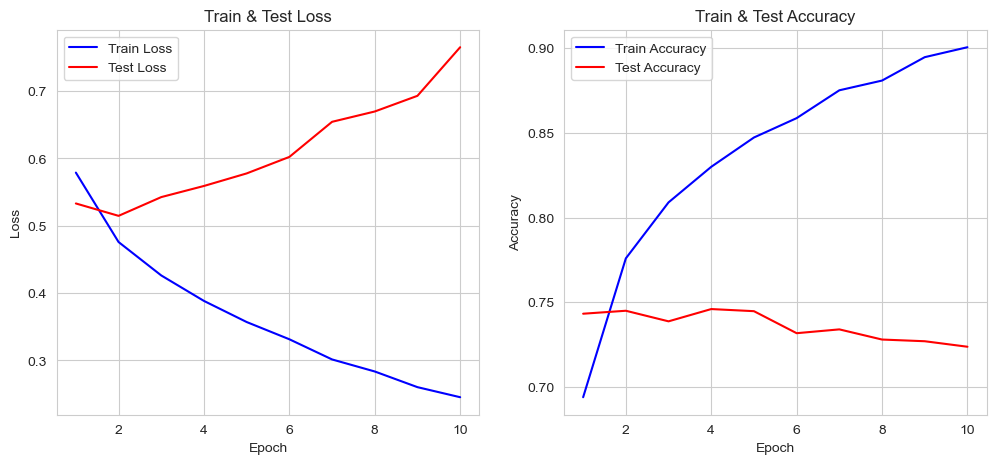

In [847]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(range(1, len(history.history['loss']) + 1), history.history['loss'], label='Train Loss', color='blue')
axes[0].plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'], label='Test Loss', color='red')
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")
axes[0].set_title("Train & Test Loss")
axes[0].legend()

axes[1].plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], label='Train Accuracy', color='blue')
axes[1].plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], label='Test Accuracy', color='red')
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Accuracy")
axes[1].set_title("Train & Test Accuracy")
axes[1].legend()

## Analyze Model Error

In [848]:
# 预测测试集
y_pred_probs = model2.predict(test_data)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# 提取错误预测的索引
y_true = test_label  # 确保 test_label 是 numpy 数组
wrong_indices = np.where(y_pred != y_true)[0]

# 提取错误样本的原始信息
error_samples = [{
    "original_text": test_raw_texts[i],
    "processed_text": test_processed_texts[i],
    "true_label": int(y_true[i]),
    "pred_label": int(y_pred[i])
} for i in wrong_indices]

# 打印前10个错误样本
for i in range(min(10, len(error_samples))):
    print(f"错误样本 {i+1}:")
    print(f"原始文本: {error_samples[i]['original_text']}")
    print(f"预处理文本: {error_samples[i]['processed_text']}")
    print(f"真实标签: {error_samples[i]['true_label']}, 预测标签: {error_samples[i]['pred_label']}\n{'-'*50}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
错误样本 1:
原始文本: Just Waking Up..Guess I'll Get REady For SKooL 
预处理文本: just wake upguess ll get ready for skool
真实标签: 0, 预测标签: 1
--------------------------------------------------
错误样本 2:
原始文本: @classicbecca bamboo/jade green ! 
预处理文本: bamboojade green
真实标签: 1, 预测标签: 0
--------------------------------------------------
错误样本 3:
原始文本: @ddlovato are you going to be at the Jonas Brothers concert on June 15th?! 
预处理文本: be you go to be at the jonas brother concert on june 15th
真实标签: 1, 预测标签: 0
--------------------------------------------------
错误样本 4:
原始文本: @ccmatthews yeah I saw, cant wait too! when I move to europe the 1st thing imma do is go 4 one of his concerts. 
预处理文本: yeah saw cant wait too when move to europe the 1st thing imma do be go one of his concert
真实标签: 1, 预测标签: 0
--------------------------------------------------
错误样本 5:
原始文本: last night with my boydfriend for a few weeks  on the brightside- should be a fun time! ;)
预处理文本: last night wi

## Test the Model

In [849]:
def testModel(model, text):
    # model = keras.models.load_model('rnn_model.keras')
    sequence = tokenizer.texts_to_sequences([text])
    test = pad_sequences(sequence, maxlen=max_len)
    pred = model.predict(test)
    pred_value = pred[0][0]
    print(f'Prediction: {pred_value * 100:.2f}%')

    if pred_value > 0.5:
        print('Positive:', text)
    else:
        print('Negative:', text)

In [850]:
testModel(model2,str('this data science article is the worst ever'))
testModel(model2,str('this data science article is the best ever'))
testModel(model2,str('I had a bad day at work.'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Prediction: 2.21%
Negative: this data science article is the worst ever
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Prediction: 74.13%
Positive: this data science article is the best ever
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Prediction: 1.48%
Negative: I had a bad day at work.


In [851]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets_test(tweet):
  # Lower Casing
    tweet = tweet.lower()
    tweet=tweet[1:]
    # Removing all URls
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet)
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

def process_tweets_test_Append(tweet):
  # Lower Casing
    tweet = tweet.lower()
    tweet=tweet[1:]
    # Removing all URls
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet)
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    #final_tokens = [w for w in tokens if w not in stopword]
    final_tokens = tokens
    #reducing a word to its word stem
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    negation_words = {"not", "no", "never", "n't"}
    prev_neg = False

    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        #finalwords.append(word)
        if word in negation_words:
          prev_neg = True
        elif prev_neg:
          finalwords.append("not_" + word)
          prev_neg = False
        else:
          finalwords.append(word)
    return ' '.join(finalwords)

In [852]:
def tokenizer(test_text):
    # 1. build word table with top 50 words
    tokenizer = Tokenizer(num_words=8)
    tokenizer.fit_on_texts(test_text)
    print("word table:", tokenizer.word_index)

    sequences = tokenizer.texts_to_sequences(test_text)
    print("test_text sequences:", sequences)

    tweets = pad_sequences(sequences, maxlen=5)
    print(tweets.shape)
    print("test_text pad_sequences:", tweets)

In [853]:
# Test tokenizer
test_text = ["I do not love machine learning",
             "Deep learning is a subset of machine learning",
             "This is an example of padding sequences in NLP"]
test_tweets = [
    "I LOVE this movie!!! It's absolutely amazing!!! #mustwatch",
    "I LOVE this movie!!! It's absolutely amazing!!! #mustwatch",
    "@user123 Thanks for the recommendation! I'll check it out.",
    "Not happy with the service at all. Never coming back!",
    "Not well with the service at all. Never coming back!",
    "Visit our website at https://www.example.com for more details!"
]

processed_test_text = [process_tweets_test(x) for x in test_tweets]
print("processed_test_text:", processed_test_text)
tokenizer(processed_test_text)

processed_test_text: ['love movie absolutely amazing mustwatch', 'love movie absolutely amazing mustwatch', 'user123 thanks recommendation ill check', 'ot happy service never coming back', 'ot well service never coming back', 'isit website detail']
word table: {'love': 1, 'movie': 2, 'absolutely': 3, 'amazing': 4, 'mustwatch': 5, 'ot': 6, 'service': 7, 'never': 8, 'coming': 9, 'back': 10, 'user123': 11, 'thanks': 12, 'recommendation': 13, 'ill': 14, 'check': 15, 'happy': 16, 'well': 17, 'isit': 18, 'website': 19, 'detail': 20}
test_text sequences: [[1, 2, 3, 4, 5], [1, 2, 3, 4, 5], [], [6, 7], [6, 7], []]
(6, 5)
test_text pad_sequences: [[1 2 3 4 5]
 [1 2 3 4 5]
 [0 0 0 0 0]
 [0 0 0 6 7]
 [0 0 0 6 7]
 [0 0 0 0 0]]


In [854]:
from sklearn.manifold import TSNE
# 提取 `Embedding` 层的权重
embedding_layer = model2.get_layer("embedding_7")  # 确保你的 `Embedding` 层名字是 "embedding"
embedding_weights = embedding_layer.get_weights()[0]  # shape: (max_words, embedding_dim)
print("Embedding shape:", embedding_weights.shape)  # 应该是 (max_words, 64) 之类的

# 获取 tokenizer 中的单词索引
word_index = tokenizer.word_index
print("Len word_index:", len(word_index))  # 输出词典大小
reverse_word_index = {v: k for k, v in word_index.items()}  # 反转索引以便获取单词

# 选择词频最高的 200 个单词
selected_words = 200
top_indices = np.array([idx for word, idx in word_index.items() if idx < selected_words + 1])  # 取前 200 词
top_vectors = embedding_weights[top_indices]

# 使用 t-SNE 降维到 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
reduced_vectors = tsne.fit_transform(top_vectors)

# 绘制散点图
plt.figure(figsize=(12, 8))
for i, word_idx in enumerate(top_indices):
    word = reverse_word_index.get(word_idx, "?")  # 获取单词
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], alpha=0.7)
    plt.text(reduced_vectors[i, 0] + 0.02, reduced_vectors[i, 1] + 0.02, word, fontsize=10)

plt.title("Word Embeddings Visualization (t-SNE)")
plt.show()

ValueError: No such layer: embedding_7. Existing layers are: ['embedding_15', 'lstm_15', 'dense_38', 'batch_normalization_4', 'dense_39'].